# Reporte analítica de datos - Proyecto de Grado II

## Exploración de los datos para el municipio de BUGA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
yopal = pd.read_csv('../dengue_data/Yopal.csv')
df = pd.DataFrame(yopal)

### *Número de casos reportados por año*

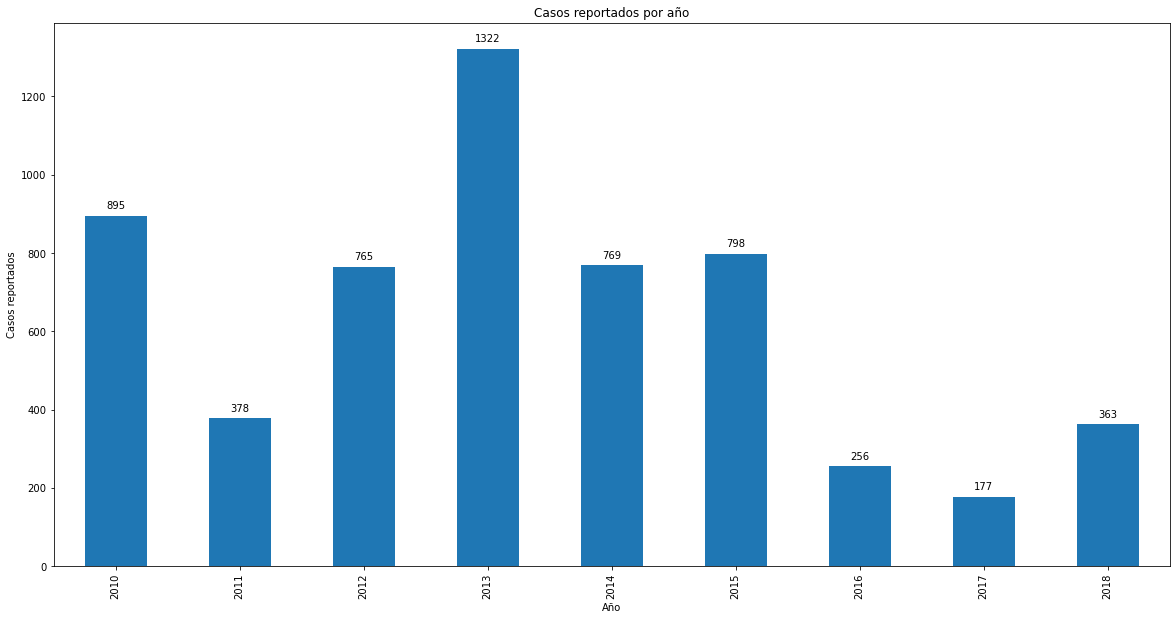

In [13]:
years = df['Ano'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
years.set_xlabel('Año')
years.set_ylabel('Casos reportados')
years.set_title('Casos reportados por año')

for p in years.patches:
    years.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por mes*

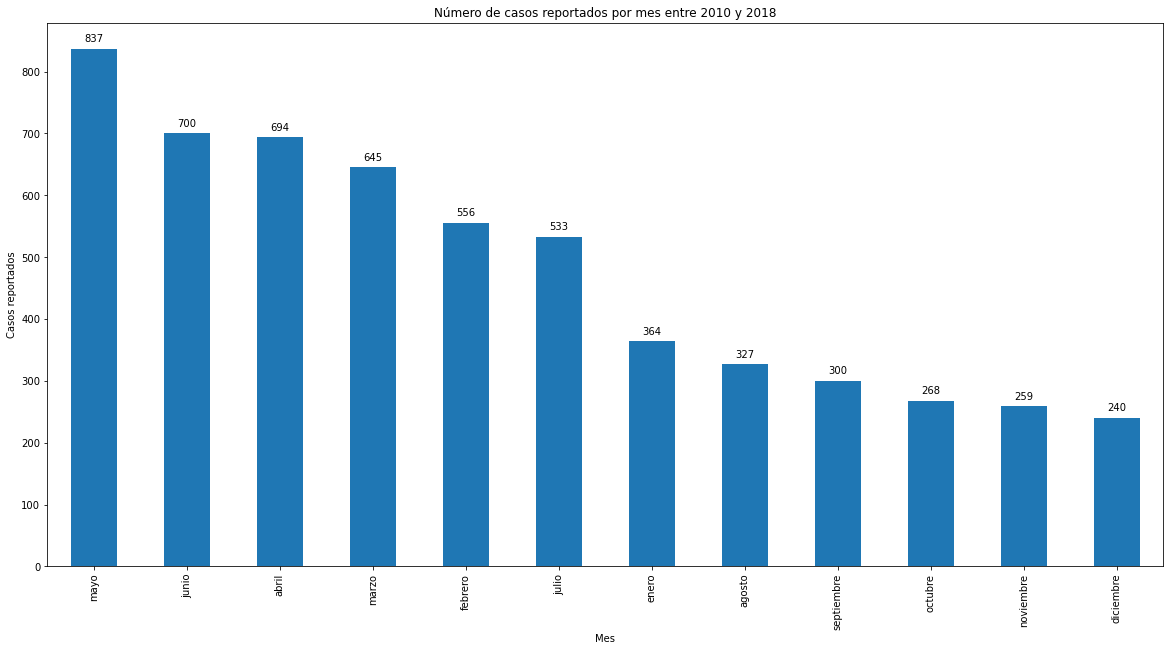

In [4]:
months = df['MesOcurrencia'].value_counts().plot(kind='bar', figsize=(20, 10))
months.set_xlabel('Mes')
months.set_ylabel('Casos reportados')
months.set_title('Número de casos reportados por mes entre 2010 y 2018')

for p in months.patches:
    months.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por sexo*

Text(0.5, 1.0, 'Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018')

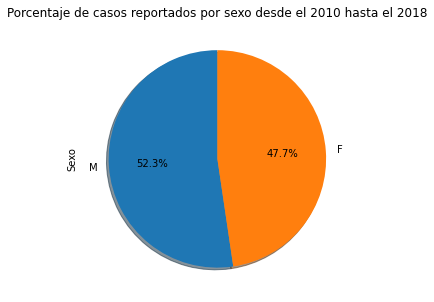

In [5]:
gender = df['Sexo'].value_counts().plot(kind='pie', shadow = True,startangle=90, figsize=(10,5), autopct='%1.1f%%')
gender.set_title("Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018")

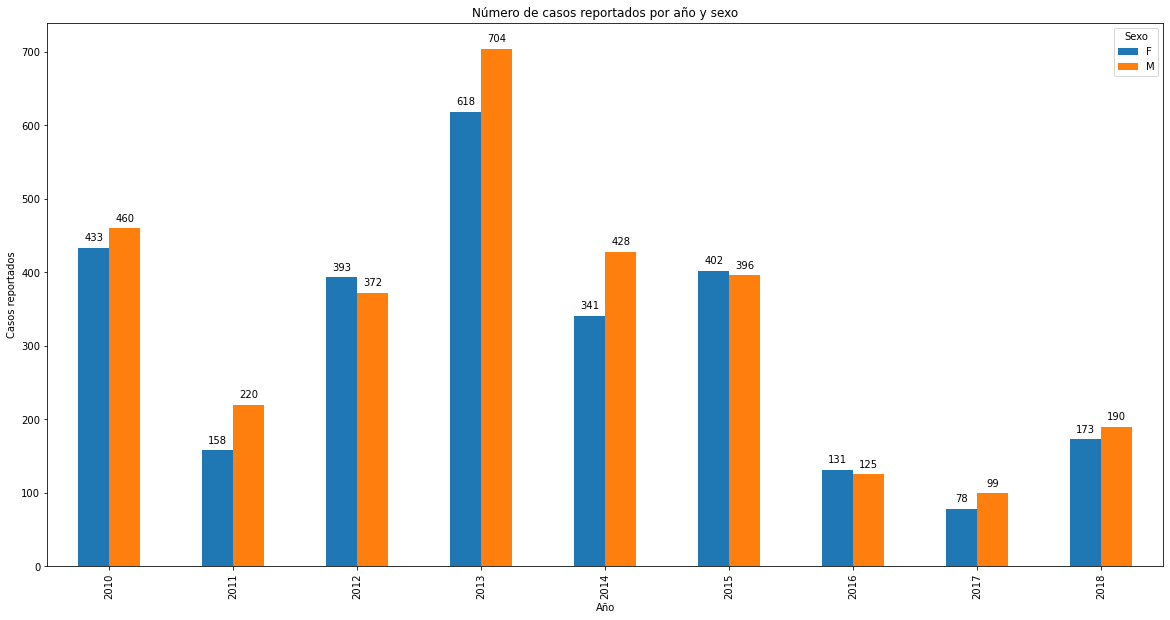

In [6]:
genders_by_year = buga.groupby(["Ano", 'Sexo']).size().unstack(level=1).plot(kind='bar', figsize=(20,10))

genders_by_year.set_xlabel('Año')
genders_by_year.set_ylabel('Casos reportados')
genders_by_year.set_title('Número de casos reportados por año y sexo')

for p in genders_by_year.patches:
    genders_by_year.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

### *Número de casos reportados por comuna*

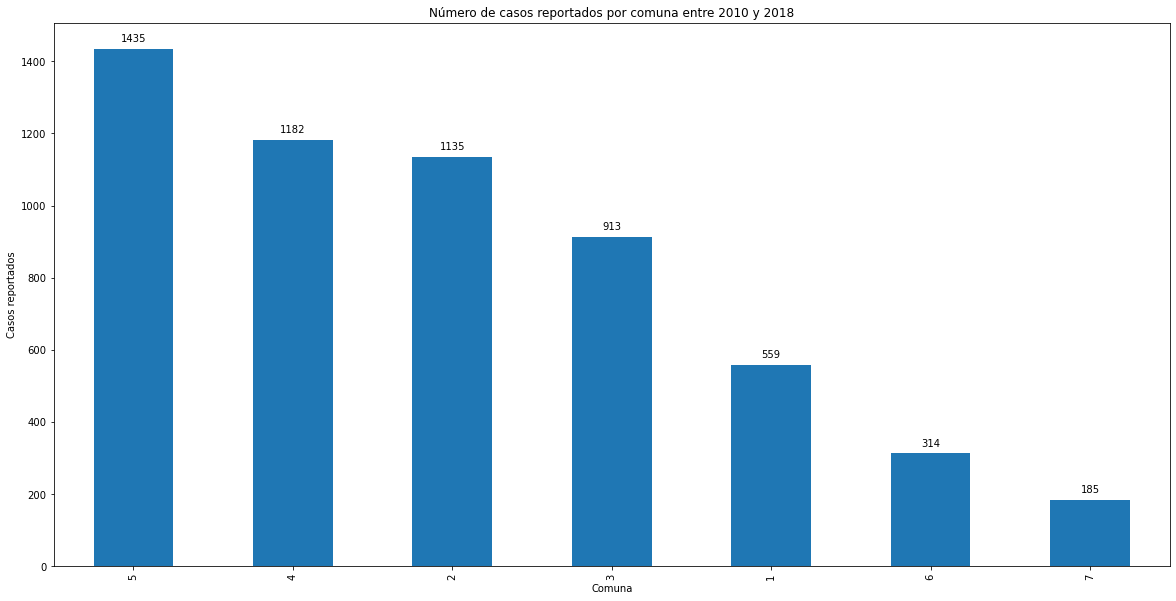

In [7]:
commune = df['Comuna'].value_counts().plot(kind='bar', figsize=(20, 10))
commune.set_xlabel('Comuna')
commune.set_ylabel('Casos reportados')
commune.set_title('Número de casos reportados por comuna entre 2010 y 2018')

for p in commune.patches:
    commune.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y comunas')

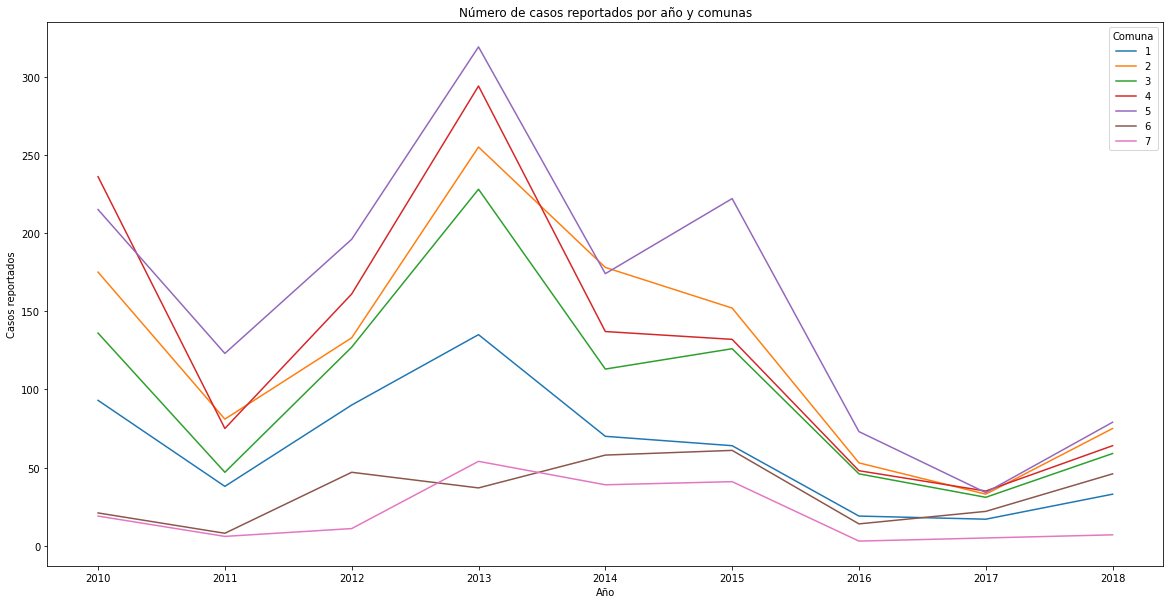

In [8]:
communes_by_year = buga.groupby(["Ano", 'Comuna']).size().unstack(level=1).plot(kind='line', figsize=(20,10))

communes_by_year.set_xlabel('Año')
communes_by_year.set_ylabel('Casos reportados')
communes_by_year.set_title('Número de casos reportados por año y comunas')

### *Número de casos reportados por barrio*

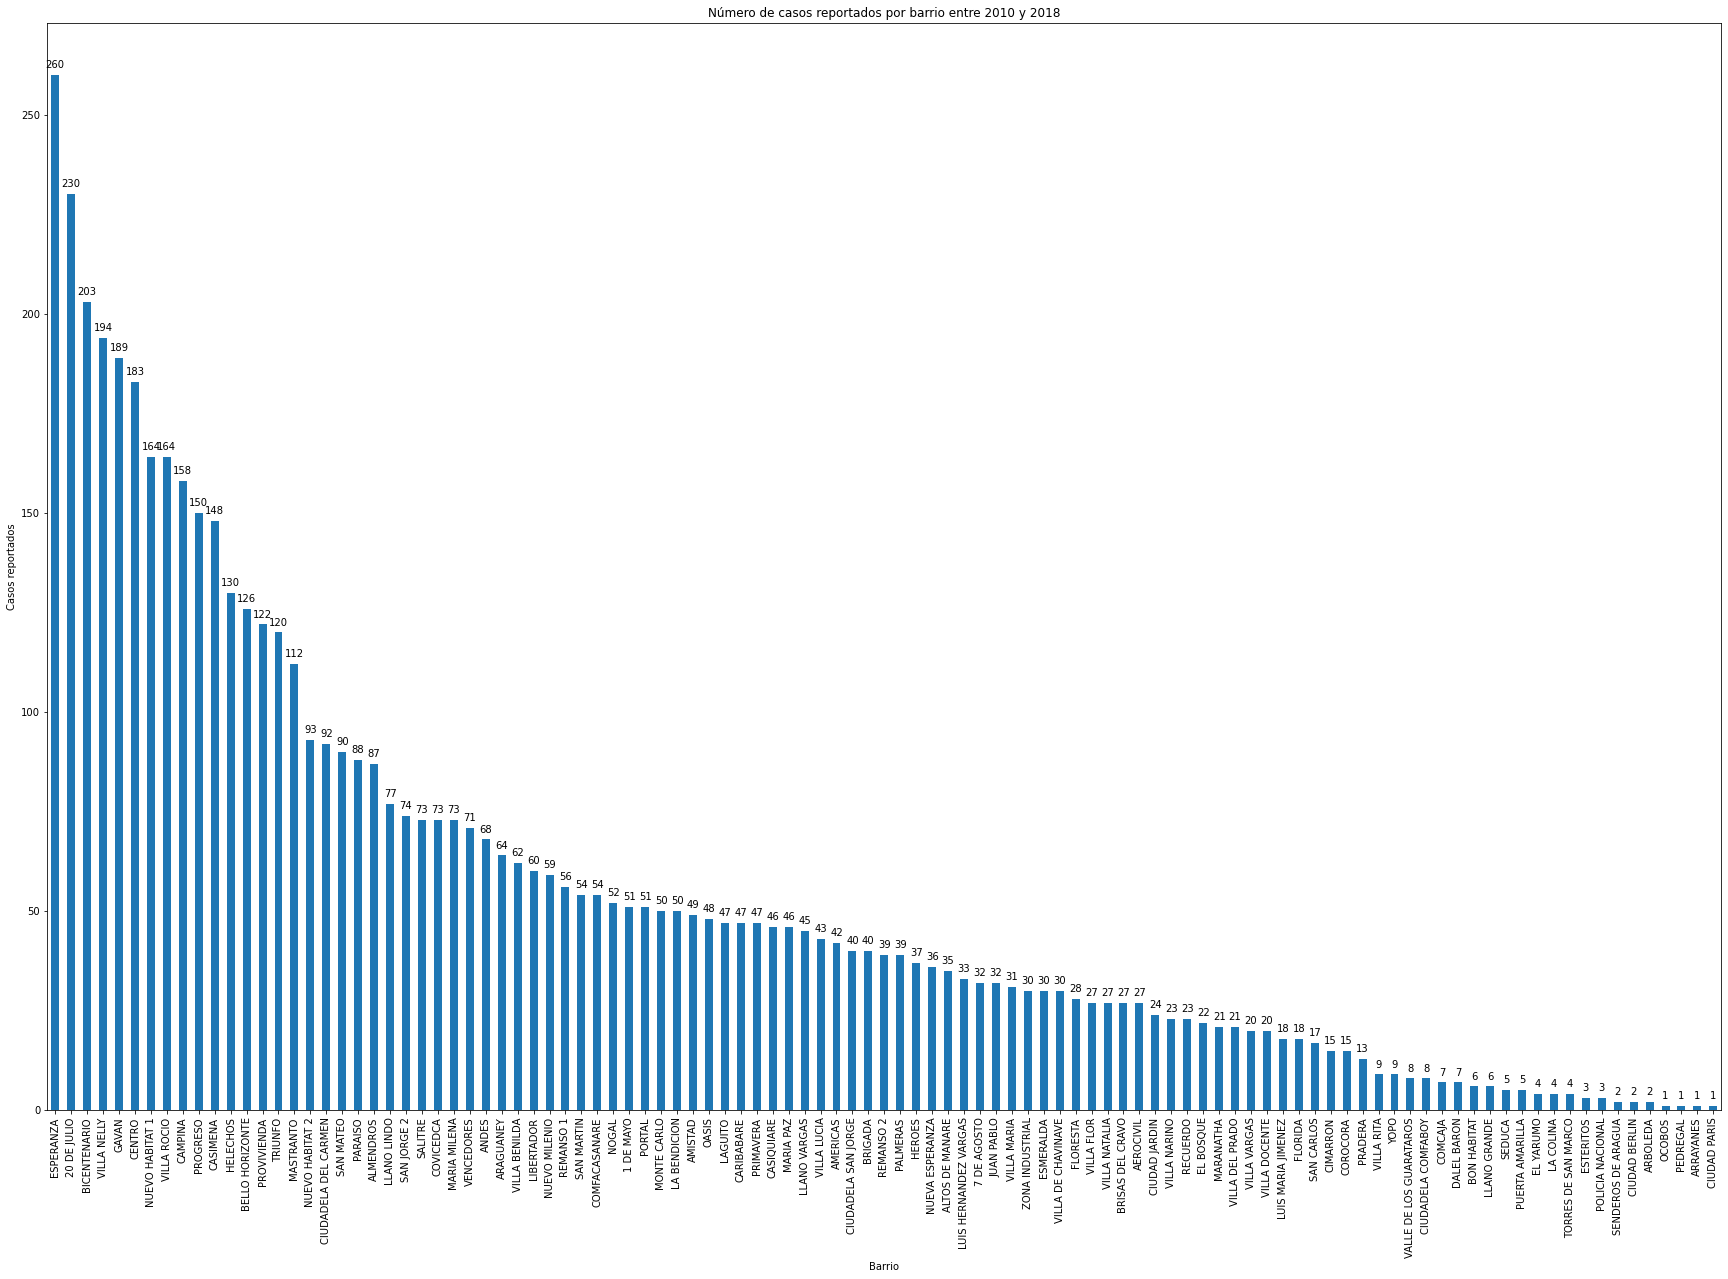

In [9]:
neighborhood = df['Barrio'].value_counts().plot(kind='bar', figsize=(30,20))
neighborhood.set_xlabel('Barrio')
neighborhood.set_ylabel('Casos reportados')
neighborhood.set_title('Número de casos reportados por barrio entre 2010 y 2018')

for p in neighborhood.patches:
    neighborhood.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por rango de edad*

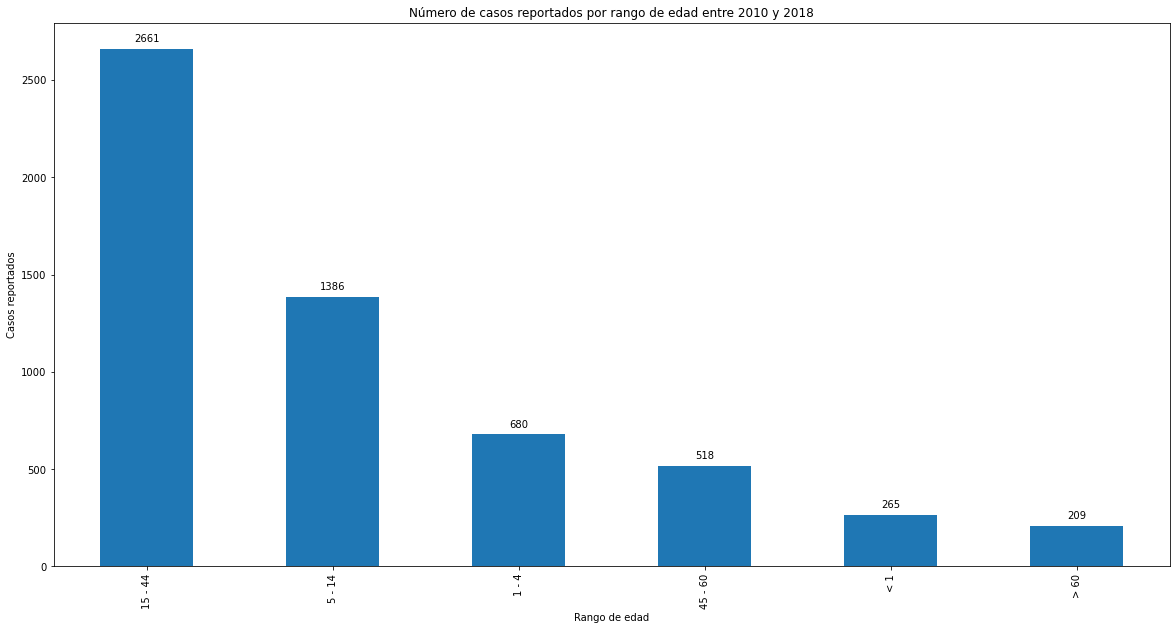

In [10]:
age_range = df['GrupoEdad'].value_counts().plot(kind='bar', figsize=(20,10))
age_range.set_xlabel('Rango de edad')
age_range.set_ylabel('Casos reportados')
age_range.set_title('Número de casos reportados por rango de edad entre 2010 y 2018')

for p in age_range.patches:
    age_range.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y rango de edad')

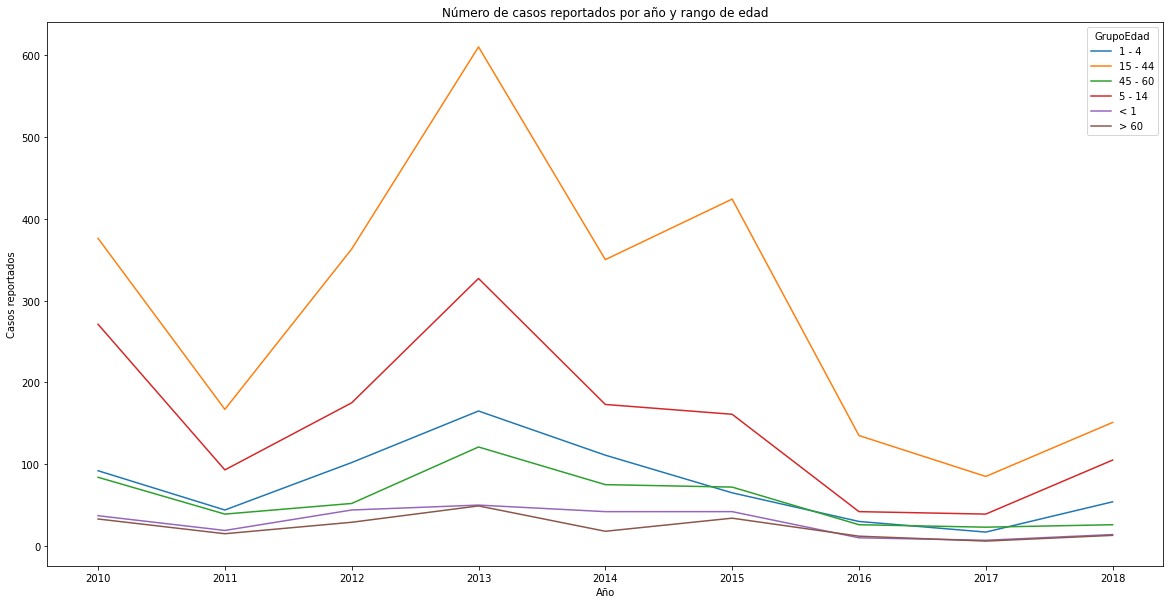

In [11]:
age_by_year = buga.groupby(["Ano", 'GrupoEdad']).size().unstack(level=1).plot(kind='line', figsize=(20,10))

age_by_year.set_xlabel('Año')
age_by_year.set_ylabel('Casos reportados')
age_by_year.set_title('Número de casos reportados por año y rango de edad')